# Часть 2: Исследовательский анализ данных в Python и проверка гипотез. Знакомство с данными

- Автор: Ивегеш Ольга
- Дата: 07.07.2025

## Описание данных
В вашем распоряжении снова будут данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 31 октября 2024 года. Для удобства работы с данными на платформе в тетради Jupyter Notebook мы подготовили два датасета <b>final_tickets_orders_df.csv</b> и <b>final_tickets_events_df.csv</b>.

Первый датасет <b>final_tickets_orders_df.csv</b> включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:
- order_id — уникальный идентификатор заказа.
- user_id — уникальный идентификатор пользователя.
- created_dt_msk — дата создания заказа (московское время).
- created_ts_msk — дата и время создания заказа (московское время).
- event_id — идентификатор мероприятия из таблицы events.
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- age_limit — возрастное ограничение мероприятия.
- currency_code — валюта оплаты, например rub для российских рублей.
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;
- revenue — выручка от заказа.
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.

В данные также был добавлен столбец <i>days_since_prev</i> с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Второй датасет <b>final_tickets_events_df.csv</b> содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит такие поля:
- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.

Выручка от заказов может бы представлена в разных валютах. Удобно будет привести данные к одной — к российским рублям. В вашем распоряжении будет датасет <b>final_tickets_tenge_df.csv</b> с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:
- nominal — номинал (100 тенге);
- data — дата;
- curs — курс тенге к рублю;
- cdx — обозначение валюты (kzt).

Используйте эти данные для конвертации валюты.

## Цели и задачи проекта

Проведите исследовательский анализ данных, чтобы дать ответы на вопросы коллег. В ходе проекта вы будете активно работать с категориями событий, рассчитывать среднюю выручку с заказа и продажи одного билета в рублях, а также изучать распределение значений по категориям и периодам времени.

## Содержание проекта

Шаг 0. Оформление тетрадки Jupyter Notebook

Шаг 1. Загрузка данных и знакомство с ними

Шаг 2. Предобработка данных и подготовка их к исследованию


### Шаг 1. Загрузка данных и знакомство с ними

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 
from scipy.stats import shapiro, probplot, ttest_ind, mannwhitneyu

In [7]:
path='https://code.s3.yandex.net/datasets/'
final_tickets_orders_df=pd.read_csv(path+'final_tickets_orders_df.csv')
final_tickets_tenge_df=pd.read_csv(path+'final_tickets_tenge_df.csv')
final_tickets_events_df=pd.read_csv(path+'final_tickets_events_df.csv')

In [8]:
final_tickets_orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [9]:
final_tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Таблица <b>final_tickets_orders_df</b> состоит из 14 столбцов, 290849 строк. Столбец days_since_prev содержит пропуски. 

При обработке можно изменить тип данных столбцов created_dt_msk и created_ts_msk на дату, currency_code и device_type_canonical на категорию. 

In [11]:
final_tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [12]:
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Таблица <b>final_tickets_tenge_df</b> состоит из 4 столбцов, 357 строк. Пропусков в данных нет. 

При обработке можно изменить тип данных столбцов data на дату, cdx на категорию. 

In [14]:
final_tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [15]:
final_tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Таблица <b>final_tickets_events_df</b> состоит из 11 столбцов, 22427 строк. Пропусков в данных нет.  

### Шаг 2. Предобработка данных и подготовка их к исследованию

In [18]:
final_tickets_orders_df['days_since_prev'].isna().sum()

21940

In [19]:
final_tickets_orders_df['days_since_prev'].isna().mean()

0.07543433190418396

Столбец <b>days_since_prev</b> содержит 21940 пропущенных значений. Это составляет 7.5% от всех данных. Если покупки не было, то данные содержат пропуск.

In [21]:
for column in ['order_id','event_id',
               'tickets_count']:
    final_tickets_orders_df[column] = pd.to_numeric(final_tickets_orders_df[column],
                                    downcast='integer')
for column in ['revenue','total','days_since_prev']:
    final_tickets_orders_df[column] = pd.to_numeric(final_tickets_orders_df[column],
                                    downcast='float')
for column in ['created_dt_msk','created_ts_msk']:
    final_tickets_orders_df[column] = pd.to_datetime(final_tickets_orders_df[column])
    
for column in ['currency_code','age_limit','device_type_canonical']:    
    final_tickets_orders_df[column] = final_tickets_orders_df[column].astype('category')

In [22]:
final_tickets_orders_df.dtypes

order_id                          int32
user_id                          object
created_dt_msk           datetime64[ns]
created_ts_msk           datetime64[ns]
event_id                          int32
cinema_circuit                   object
age_limit                      category
currency_code                  category
device_type_canonical          category
revenue                         float64
service_name                     object
tickets_count                      int8
total                           float64
days_since_prev                 float32
dtype: object

In [23]:
final_tickets_tenge_df['data'] = pd.to_datetime(final_tickets_tenge_df['data'])
final_tickets_tenge_df['nominal'] = pd.to_numeric(final_tickets_tenge_df['nominal'],
                                    downcast='integer')
final_tickets_tenge_df['curs'] = pd.to_numeric(final_tickets_tenge_df['curs'],
                                    downcast='float')
final_tickets_tenge_df.dtypes

data       datetime64[ns]
nominal              int8
curs              float32
cdx                object
dtype: object

Типы данных оптимизированы, типы данных приведены к необходимым. 

In [25]:
final_tickets_orders_df['device_type_canonical'].sort_values().unique()

['desktop', 'mobile']
Categories (2, object): ['desktop', 'mobile']

In [26]:
final_tickets_orders_df['currency_code'].sort_values().unique()

['kzt', 'rub']
Categories (2, object): ['kzt', 'rub']

Категорийные значения проверены. Встречаются по 2 категории в каждом столбце.

In [28]:
# Анализ категориальных значений
for column in ['age_limit', 'currency_code', 'device_type_canonical']:
    print(f"\nColumn: {column}")
    print("Unique values:", final_tickets_orders_df[column].unique())
    print("Missing values count:", final_tickets_orders_df[column].isna().sum())
    print("Value counts:")
    print(final_tickets_orders_df[column].value_counts(dropna=False), "\n")


Column: age_limit
Unique values: [16, 0, 18, 12, 6]
Categories (5, int64): [0, 6, 12, 16, 18]
Missing values count: 0
Value counts:
age_limit
16    78579
12    62557
0     61487
6     52173
18    36053
Name: count, dtype: int64 


Column: currency_code
Unique values: ['rub', 'kzt']
Categories (2, object): ['kzt', 'rub']
Missing values count: 0
Value counts:
currency_code
rub    285780
kzt      5069
Name: count, dtype: int64 


Column: device_type_canonical
Unique values: ['mobile', 'desktop']
Categories (2, object): ['desktop', 'mobile']
Missing values count: 0
Value counts:
device_type_canonical
mobile     232679
desktop     58170
Name: count, dtype: int64 



In [29]:
rub_final_tickets_orders_df=final_tickets_orders_df.loc[final_tickets_orders_df['currency_code'] == 'rub'].reset_index().copy()
kzt_final_tickets_orders_df=final_tickets_orders_df.loc[final_tickets_orders_df['currency_code'] == 'kzt'].reset_index().copy()
rub=len(rub_final_tickets_orders_df)
kzt=len(kzt_final_tickets_orders_df)
print(f"Размер исходного массива с рублями: {rub}")
print(f"Размер исходного массива с тенге: {kzt}")

Размер исходного массива с рублями: 285780
Размер исходного массива с тенге: 5069


In [30]:
rub_final_tickets_orders_df[['revenue','tickets_count']].describe(percentiles = [0.99])

,revenue,tickets_count
count,285780.000000,285780.000000
mean,547.568333,2.754077
std,871.524559,1.171419
min,-90.760000,1.000000
50%,346.100000,3.000000
99%,2569.594200,6.000000
max,81174.540000,57.000000


In [31]:
kzt_final_tickets_orders_df[['revenue','tickets_count']].describe(percentiles = [0.99])

,revenue,tickets_count
count,5069.000000,5069.000000
mean,4995.206767,2.762872
std,4916.752776,1.115558
min,0.000000,1.000000
50%,3698.830000,3.000000
99%,17617.240000,6.000000
max,26425.860000,6.000000


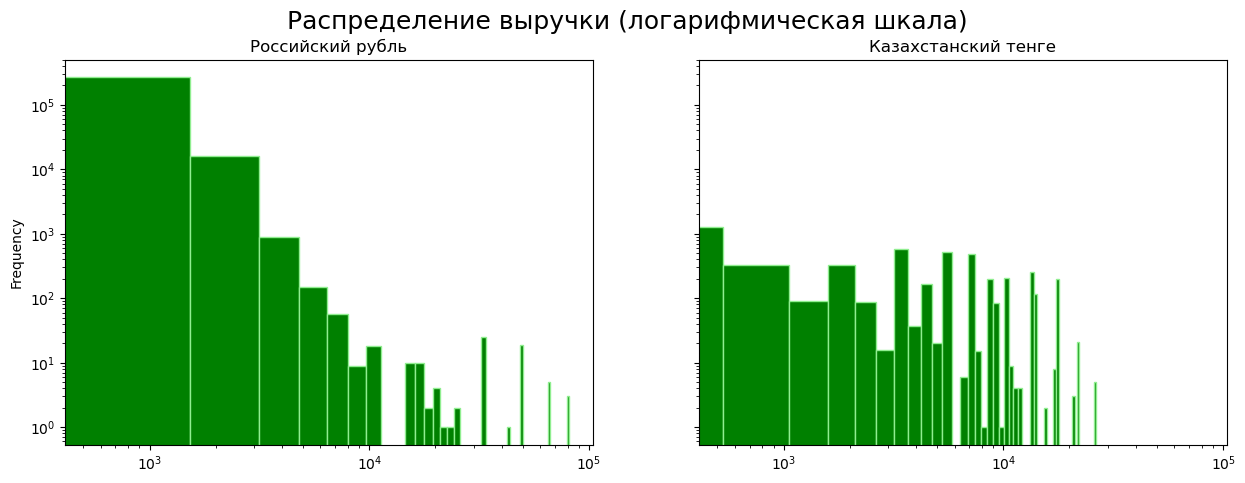

In [32]:
fig, axx = plt.subplots(ncols=2, figsize=(15, 5), sharex=True, sharey=True)
rub_final_tickets_orders_df['revenue'].plot(kind = 'hist', ax=axx[0], bins=50, color='green', edgecolor='lightgreen', log=True)
kzt_final_tickets_orders_df['revenue'].plot(kind = 'hist', ax=axx[1], bins=50, color='green', edgecolor='lightgreen', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
axx[0].set_title('Российский рубль')
axx[1].set_title('Казахстанский тенге')
fig.suptitle('Распределение выручки (логарифмическая шкала)', fontsize=18)
plt.show()

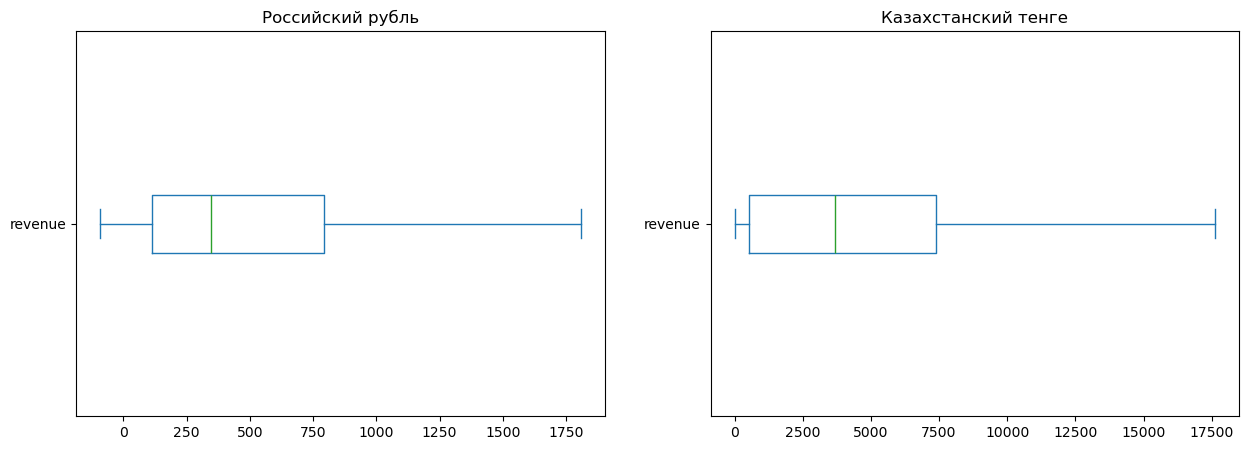

In [33]:
fig, axx = plt.subplots(ncols=2, figsize=(15, 5))

rub_final_tickets_orders_df['revenue'].plot(kind = 'box', ax=axx[0], vert=False,
                     showfliers=False)
axx[0].set_title('Российский рубль')
kzt_final_tickets_orders_df['revenue'].plot(kind = 'box', ax=axx[1], vert=False,
                     showfliers=False)
axx[1].set_title('Казахстанский тенге')

plt.show()

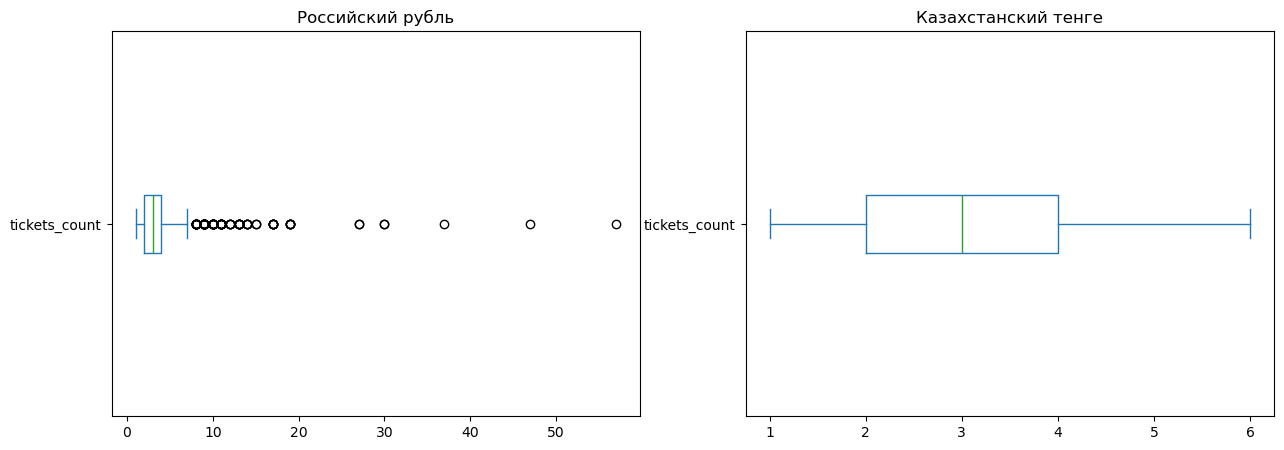

In [34]:
fig, axx = plt.subplots(ncols=2, figsize=(15, 5))

rub_final_tickets_orders_df['tickets_count'].plot(kind = 'box', ax=axx[0], vert=False,
                     showfliers=True)
axx[0].set_title('Российский рубль')
kzt_final_tickets_orders_df['tickets_count'].plot(kind = 'box', ax=axx[1], vert=False,
                     showfliers=True)
axx[1].set_title('Казахстанский тенге')

plt.show()

In [35]:
# Вычисляем квартили Q1 и Q3
Q1 = rub_final_tickets_orders_df['revenue'].quantile(0.25)
Q3 = rub_final_tickets_orders_df['revenue'].quantile(0.75)
rub_Q4= rub_final_tickets_orders_df['revenue'].quantile(0.99)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
rub_upper_bound = Q3 + 1.5 * IQR
print('Российский рубль:')
print(f'Верхний порог выбросов: {rub_upper_bound}')
print(f'99-й процентиль: {rub_Q4}')

Российский рубль:
Верхний порог выбросов: 1808.5087500000002
99-й процентиль: 2569.5942000000005


In [36]:
# Вычисляем квартили Q1 и Q3
Q1 = kzt_final_tickets_orders_df['revenue'].quantile(0.25)
Q3 = kzt_final_tickets_orders_df['revenue'].quantile(0.75)
kzt_Q4= kzt_final_tickets_orders_df['revenue'].quantile(0.99)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
kzt_upper_bound = Q3 + 1.5 * IQR
print('Казахстанский тенге:')
print(f'Верхний порог выбросов: {kzt_upper_bound}')
print(f'99-й процентиль: {kzt_Q4}')

Казахстанский тенге:
Верхний порог выбросов: 17717.0
99-й процентиль: 17617.24


Отберем значения по 99-му процентилю

In [38]:
rub_final_tickets_orders_df=rub_final_tickets_orders_df.loc[(rub_final_tickets_orders_df.revenue < rub_Q4)]
kzt_final_tickets_orders_df=kzt_final_tickets_orders_df.loc[(kzt_final_tickets_orders_df.revenue < kzt_Q4)]

In [39]:
final_tickets_orders_df=pd.concat([rub_final_tickets_orders_df, kzt_final_tickets_orders_df]).reset_index()
final_tickets_orders_df = final_tickets_orders_df.drop(['level_0', 'index'], axis=1)
final_tickets_orders_df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287761,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,20.0
287762,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,56.0
287763,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,1.0
287764,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,Мой билет,2,61647.16,NaN


Проверим явные и неявные дубликаты.

In [41]:
final_tickets_orders_df.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev']).sum()

30

In [42]:
final_tickets_orders_df=final_tickets_orders_df.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev'],  keep='first').reset_index(drop=True)

Дубликаты проверены, повторяющиеся значения удалены, так как малый процент от всех данных

<b> Создайте несколько новых столбцов:</b>
- revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год. Значения в рублях представлены для 100 тенге.
- one_ticket_revenue_rub — рассчитайте выручку с продажи одного билета на мероприятие.
- month — выделите месяц оформления заказа в отдельный столбец.
- season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [45]:
df=pd.merge(final_tickets_orders_df,final_tickets_tenge_df, how='left', left_on='created_dt_msk', right_on='data')
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,2024-08-20,100,18.697201,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,2024-07-23,100,18.341900,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,2024-10-06,100,19.647499,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2024-07-13,100,18.500999,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,2024-10-04,100,19.664801,kzt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287731,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,20.0,2024-07-11,100,18.273800,kzt
287732,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,56.0,2024-09-05,100,18.421700,kzt
287733,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,1.0,2024-09-06,100,18.550400,kzt
287734,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,Мой билет,2,61647.16,NaN,2024-06-21,100,18.579100,kzt


Приведем выручку с заказа к единой валюте — российскому рублю.

In [47]:
df['revenue_rub'] = np.where(
    df['currency_code'] == df['cdx'],
    df['revenue'] * df['curs'] / 100,
    df['revenue']
)
df = df.drop(['data', 'cdx','nominal','curs'], axis=1)
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.940000
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.450000
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.570000
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.490000
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287731,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,20.0,865.359449
287732,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,56.0,872.363265
287733,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,1.0,343.072949
287734,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,Мой билет,2,61647.16,NaN,687.209312


Рассчитаем выручку с продажи одного билета на мероприятие.

In [49]:
df['one_ticket_revenue_rub']=df['revenue_rub']/df['tickets_count']
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.940000,380.485000
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.450000,144.725000
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.570000,314.642500
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.490000,4.245000
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.410000,463.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287731,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,20.0,865.359449,432.679724
287732,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,56.0,872.363265,436.181633
287733,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,1.0,343.072949,343.072949
287734,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,Мой билет,2,61647.16,NaN,687.209312,343.604656


Выделим месяц оформления заказа

In [51]:
df['month']=df['created_dt_msk'].dt.month
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub,month
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.940000,380.485000,8
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.450000,144.725000,7
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.570000,314.642500,10
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.490000,4.245000,7
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.410000,463.470000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287731,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,20.0,865.359449,432.679724,7
287732,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,56.0,872.363265,436.181633,9
287733,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,1.0,343.072949,343.072949,9
287734,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,Мой билет,2,61647.16,NaN,687.209312,343.604656,6


Создадим столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [53]:
def season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

df['season'] = df['month'].apply(season)
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.940000,380.485000,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.450000,144.725000,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.570000,314.642500,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.410000,463.470000,10,осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287731,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,20.0,865.359449,432.679724,7,лето
287732,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,Билеты без проблем,2,67650.36,56.0,872.363265,436.181633,9,осень
287733,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,Мой билет,1,30823.58,1.0,343.072949,343.072949,9,осень
287734,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,Мой билет,2,61647.16,NaN,687.209312,343.604656,6,лето


- Типы данных оптимизированы, типы данных приведены к необходимым.
- Категорийные данные проверены.
- Исключены выбросы из данных по выручке. В рублях исключенные данные составили 1%, в тенге 5%.
- Добавлены новые столбцы (revenue_rub, one_ticket_revenue_rub, month и season)

In [55]:
total_rows=len(rub_final_tickets_orders_df)
percentage = round(((rub-total_rows) / total_rows * 100))
print(f"Доля срезанных данных с рублями: {percentage} %")

Доля срезанных данных с рублями: 1 %


In [56]:
total_rows=len(kzt_final_tickets_orders_df)
percentage = round(((kzt-total_rows) / total_rows * 100))
print(f"Доля срезанных данных с тенге: {percentage} %")

Доля срезанных данных с тенге: 5 %


### Шаг 3. Исследовательский анализ данных
<b> 3.1. Анализ распределения заказов по сегментам и их сезонные изменения </b>

In [58]:
df.groupby('month')['order_id'].count()

month
6     34153
7     40410
8     44572
9     69330
10    99271
Name: order_id, dtype: int64

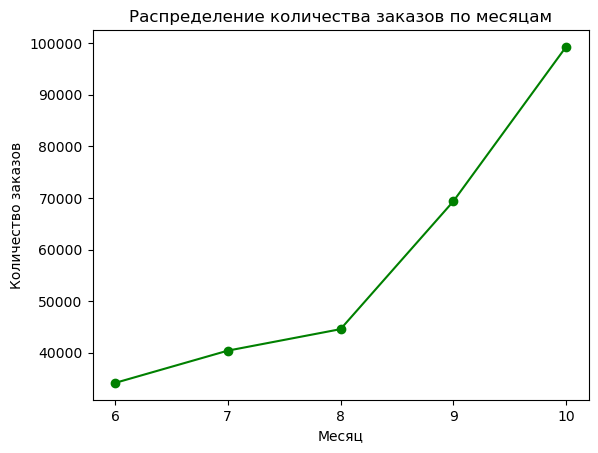

In [59]:
df.groupby('month')['order_id'].count().plot(kind='line', 
                                             color='green', 
                                             marker='o')
plt.title('Распределение количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(6,11))
plt.show()

In [60]:
df=df.merge(final_tickets_events_df,how='left',on='event_id')
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287731,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,...,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерт,концерты,№2434,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376"
287732,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,...,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерт,концерты,№2434,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376"
287733,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
287734,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"


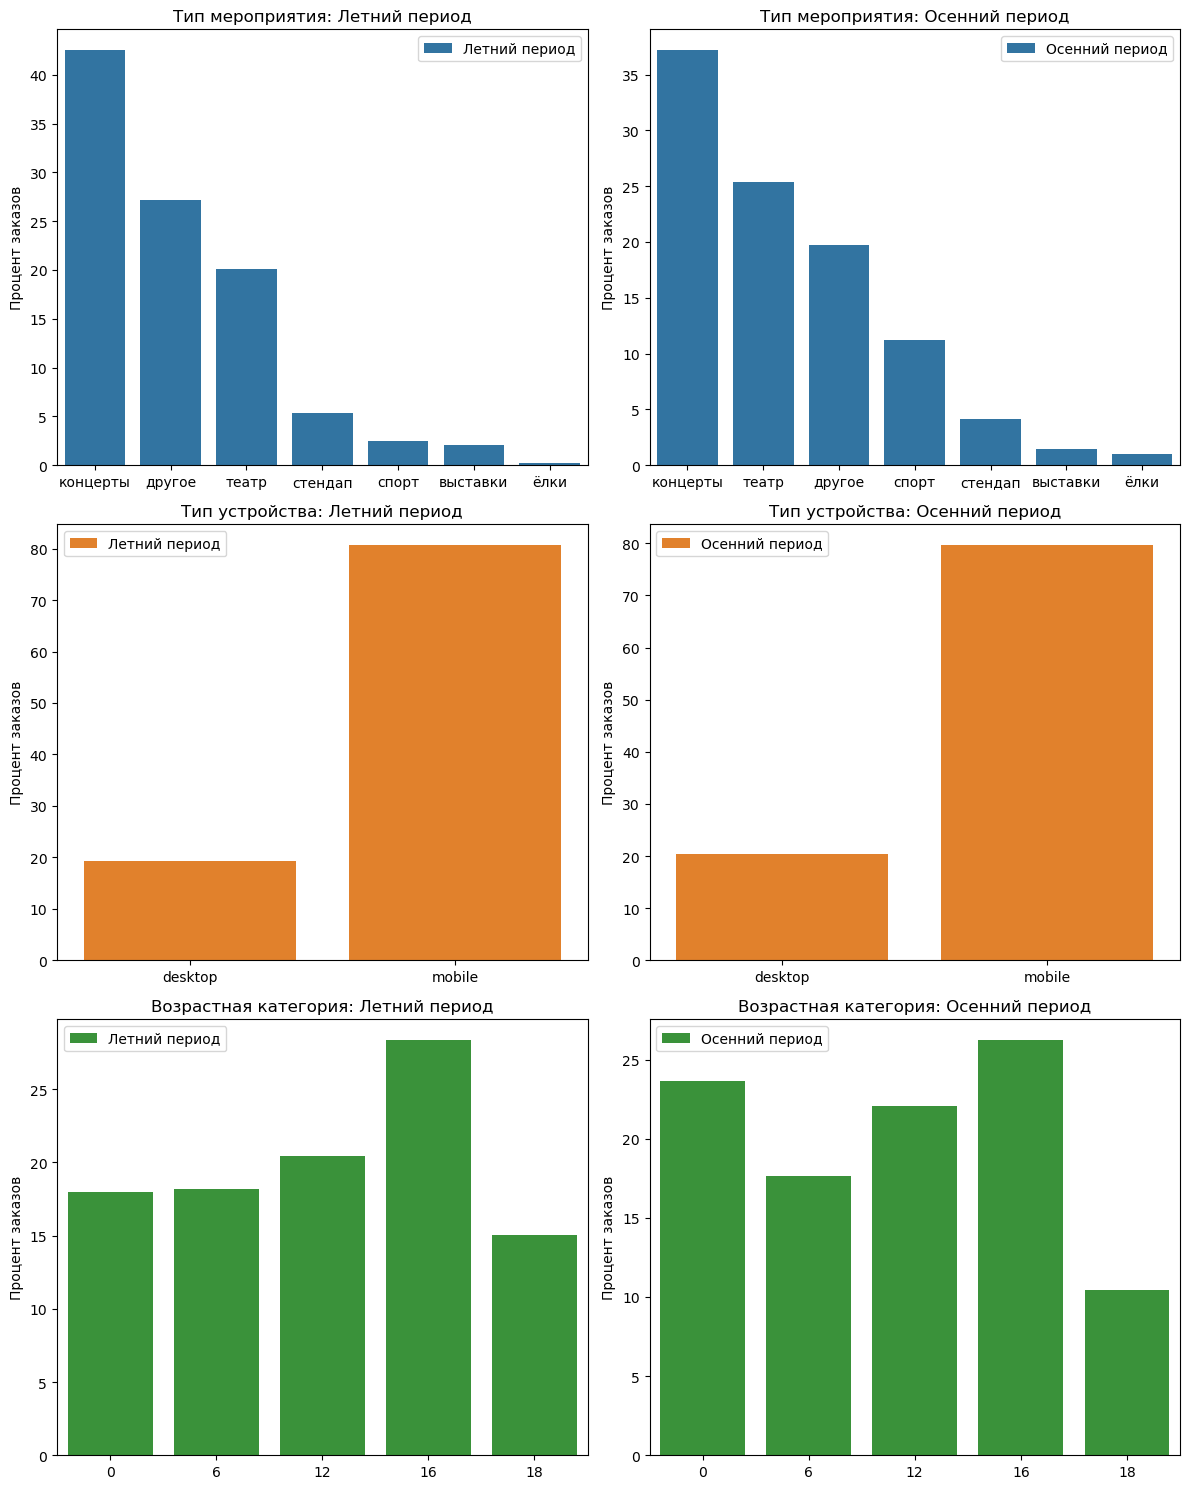

In [61]:
summer_orders = df.loc[df['season']=='лето']
autumn_orders = df.loc[df['season']=='осень']
summer_distribution_event_type = summer_orders['event_type_main'].value_counts(normalize=True) * 100
autumn_distribution_event_type = autumn_orders['event_type_main'].value_counts(normalize=True) * 100

summer_distribution_device_type = summer_orders['device_type_canonical'].value_counts(normalize=True) * 100
autumn_distribution_device_type = autumn_orders['device_type_canonical'].value_counts(normalize=True) * 100

summer_distribution_age_limit = summer_orders['age_limit'].value_counts(normalize=True) * 100
autumn_distribution_age_limit = autumn_orders['age_limit'].value_counts(normalize=True) * 100
categories = ['Тип мероприятия', 'Тип устройства', 'Возрастная категория']
distributions = [(summer_distribution_event_type, autumn_distribution_event_type),
                 (summer_distribution_device_type, autumn_distribution_device_type),
                 (summer_distribution_age_limit, autumn_distribution_age_limit)]

fig, axes = plt.subplots(len(categories), 2, figsize=(12, 15))

for idx, category in enumerate(categories):
    for jdx, period in enumerate(['Летний период', 'Осенний период']):
        data = distributions[idx][jdx]
        
        sns.barplot(x=data.index, y=data.values, color=sns.color_palette()[idx % len(sns.color_palette())],
                    label=f'{period}', ax=axes[idx, jdx])
        axes[idx, jdx].set_title(f'{category}: {period}')
        axes[idx, jdx].set_xlabel('')
        axes[idx, jdx].set_ylabel('Процент заказов')

plt.tight_layout()
plt.show()

Полученные графики наглядно показывают различие в предпочтениях пользователей по трем ключевым параметрам (типы мероприятий, устройство покупки, возрастная категория мероприятия) между летними и осенними заказами. 

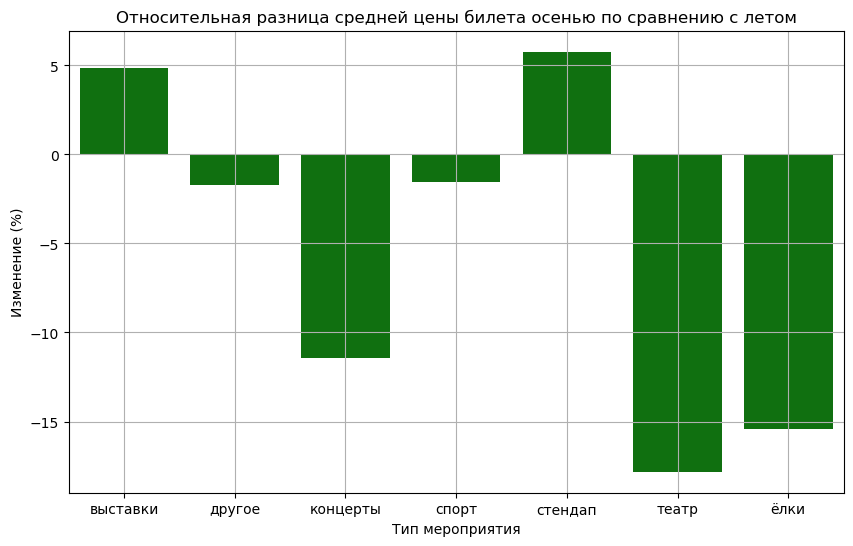

In [63]:
mean_ticket_prices_summer = summer_orders.groupby('event_type_main')['one_ticket_revenue_rub'].mean()
mean_ticket_prices_autumn = autumn_orders.groupby('event_type_main')['one_ticket_revenue_rub'].mean()
relative_change = (mean_ticket_prices_autumn - mean_ticket_prices_summer) / mean_ticket_prices_summer * 100
# Рисуем график с динамикой изменения средней цены
plt.figure(figsize=(10, 6))
sns.barplot(x=relative_change.index, y=relative_change.values, color='green')
plt.title('Относительная разница средней цены билета осенью по сравнению с летом')
plt.xlabel('Тип мероприятия')
plt.ylabel('Изменение (%)')
plt.grid(True)
plt.show()

Летом наиболее популярны к покупке билеты на выставки и стендап. Осенью билеты на концерты, спорт, театр, елки и другое покупают больше чем летом.

<b> 3.2. Осенняя активность пользователей</b>

In [66]:
pivot = autumn_orders.pivot_table(values=['order_id','user_id','one_ticket_revenue_rub'], index='created_dt_msk', aggfunc={'order_id': 'count', 'user_id':'nunique', 'one_ticket_revenue_rub':'mean'}).round(2)
pivot['avg_orders_per_user']=(pivot['order_id']/pivot['user_id']).round(2)
pivot

,one_ticket_revenue_rub,order_id,user_id,avg_orders_per_user
created_dt_msk,,,,
2024-09-01,200.17,1327,564,2.35
2024-09-02,189.46,1380,574,2.40
2024-09-03,80.13,5111,778,6.57
2024-09-04,177.69,1773,685,2.59
2024-09-05,189.51,1944,739,2.63
...,...,...,...,...
2024-10-27,186.97,2849,1034,2.76
2024-10-28,170.65,2838,985,2.88
2024-10-29,177.41,2836,998,2.84


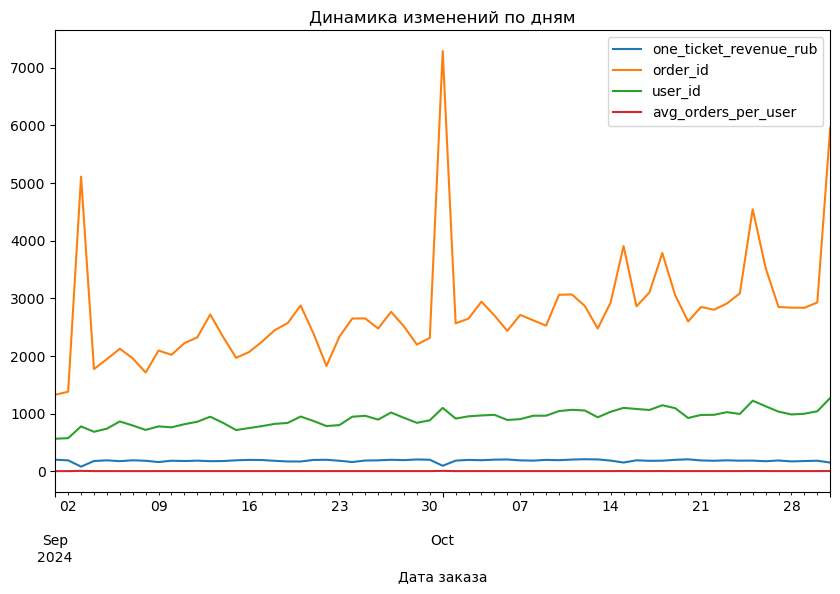

In [67]:
pivot.plot(kind='line', figsize=(10, 6))
plt.title('Динамика изменений по дням')
plt.xlabel('Дата заказа')
plt.legend()
plt.show()

На графике отображена динамика изменений количества заказов, количества покупателей. стоимости билета и среднее количество заказов на пользователя в осенний период.

Видно, что в первый день месяца происходит выброс в количестве заказов. Возможно это связано с датой выплаты зарплаты, либо с анонсированием новых мероприятий.

In [69]:
autumn_orders = autumn_orders.copy()

autumn_orders['dow'] = autumn_orders['created_dt_msk'].dt.weekday
autumn_orders

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,dow
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",6
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",4
5,2613713,000898990054619,2024-10-23,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.74,...,концерт,концерты,№1020,Лугоградская область,Кристалевск,193.0,930.0,"Школа живописи ""Солнце"" Групп","бул. Отрадный, д. 4 стр. 1",2
7,4657981,000a55a418c128c,2024-09-29,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.78,...,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",6
8,4657952,000a55a418c128c,2024-10-15,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.84,...,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287725,1013957,ff3c5654070575e,2024-10-11,2024-10-11 21:18:38,578863,нет,6,kzt,desktop,273.72,...,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",4
287726,145987,ff3c5654070575e,2024-10-26,2024-10-26 15:10:48,579640,нет,6,kzt,desktop,194.41,...,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",5
287727,3522834,ff3c5654070575e,2024-10-29,2024-10-29 15:36:07,579640,нет,6,kzt,mobile,194.41,...,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",1
287732,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,...,концерт,концерты,№2434,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",3


In [70]:
autumn_orders.groupby('dow')['dow'].count()

dow
0    21517
1    31479
2    22885
3    27169
4    24826
5    21336
6    19389
Name: dow, dtype: int64

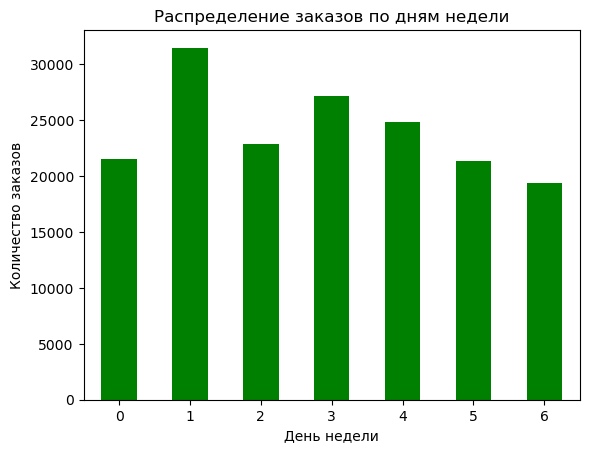

In [71]:
autumn_orders.groupby('dow')['dow'].count().plot(kind='bar', color='green')
plt.title('Распределение заказов по дням недели')
plt.ylabel('Количество заказов')
plt.xlabel('День недели')
plt.xticks(rotation=0)
plt.show()

Наиболее популяный день недели для заказов - вторник. В выходные пользователи совершают меньше заказов, чем в будни.

<b>3.3. Популярные события и партнёры</b>

In [74]:
region_table=autumn_orders.groupby('region_name').agg({'order_id': 'count', 'event_id': 'nunique'}).sort_values(by='order_id', ascending=False)
region_table['part_order']=(region_table['order_id']/region_table['order_id'].sum()).round(2)
region_table['part_event']=(region_table['event_id']/region_table['event_id'].sum()).round(2)
region_table

,order_id,event_id,part_order,part_event
region_name,,,,
Каменевский регион,46684,3910,0.28,0.25
Североярская область,20718,2613,0.12,0.16
Медовская область,12044,369,0.07,0.02
Широковская область,8715,803,0.05,0.05
Озернинский край,7480,296,0.04,0.02
...,...,...,...,...
Островогорский округ,18,4,0.00,0.00
Яснопольский округ,18,5,0.00,0.00
Крутоводский регион,14,5,0.00,0.00


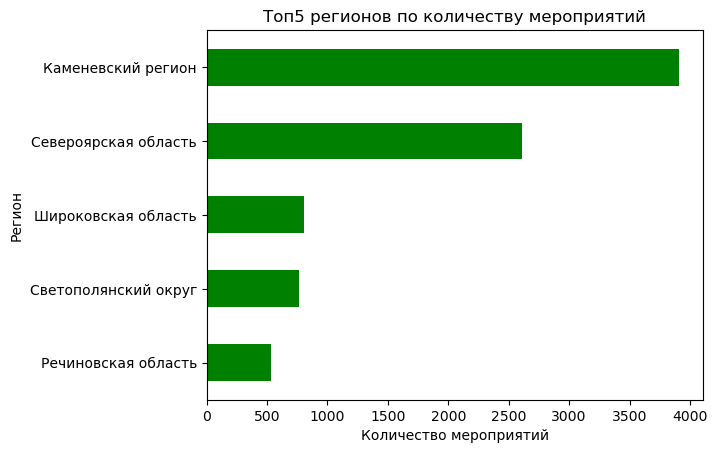

In [75]:
region_table.loc[region_table['event_id']>500]['event_id'].sort_values().plot(kind='barh', color='green')
plt.title('Топ5 регионов по количеству мероприятий')
plt.ylabel('Регион')
plt.xlabel('Количество мероприятий')
plt.show()

На графике представлены Топ5 регионов по количеству проведенных мероприятий. Каменевский регион самый активный - более 3500 мероприятий

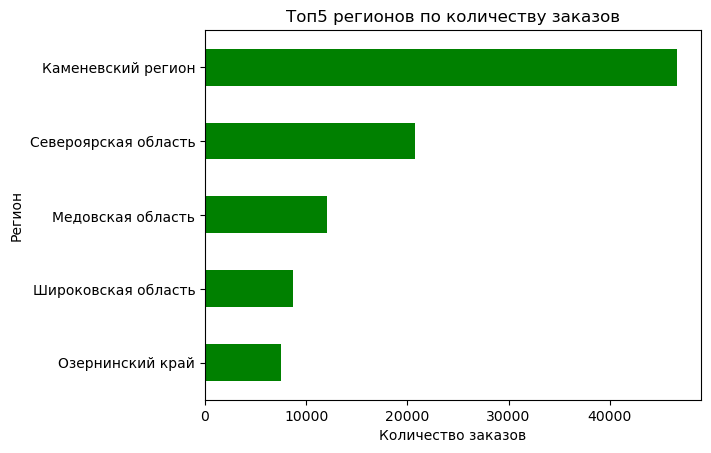

In [77]:
region_table.loc[region_table['order_id']>5000]['order_id'].sort_values().plot(kind='barh', color='green')
plt.title('Топ5 регионов по количеству заказов')
plt.ylabel('Регион')
plt.xlabel('Количество заказов')
plt.show()

На графике представлены Топ5 регионов по количеству заказов. Каменевский регион самый активный - более 45000 заказов.

Наиболее популярный регион - Каменевский регион. Там прошло 46684 заказа и 3910 мероприятия. Наименее популярный - Сосноводолинская область.

In [80]:
service_table=autumn_orders.groupby('service_name').agg({'order_id': 'count', 'event_id': 'nunique', 'revenue_rub': 'sum'}).sort_values(by='order_id', ascending=False)
service_table['part_order']=(service_table['order_id']/service_table['order_id'].sum()).round(2)
service_table['part_event']=(service_table['event_id']/service_table['event_id'].sum()).round(2)
service_table['part_revenue_rub']=(service_table['revenue_rub']/service_table['revenue_rub'].sum()).round(3)
service_table

,order_id,event_id,revenue_rub,part_order,part_event,part_revenue_rub
service_name,,,,,,
Билеты без проблем,32383,2847,1.211601e+07,0.19,0.16,0.148
Лови билет!,25792,3616,1.037679e+07,0.15,0.21,0.127
Билеты в руки,25734,2471,7.613966e+06,0.15,0.14,0.093
Мой билет,19413,1006,1.083019e+07,0.12,0.06,0.132
Облачко,15478,1409,1.061105e+07,0.09,0.08,0.130
Лучшие билеты,12445,1397,1.676010e+06,0.07,0.08,0.021
Весь в билетах,9406,599,9.325571e+06,0.06,0.03,0.114
Прачечная,5798,728,2.548310e+06,0.03,0.04,0.031
Тебе билет!,3749,859,2.137900e+06,0.02,0.05,0.026


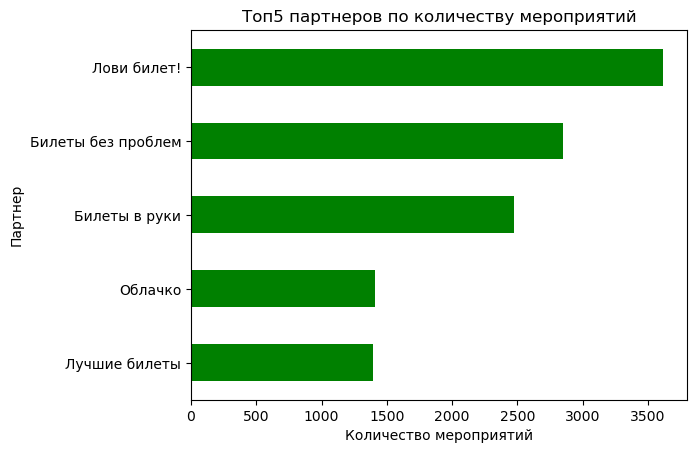

In [81]:
service_table.loc[service_table['event_id']>1300]['event_id'].sort_values().plot(kind='barh', color='green')
plt.title('Топ5 партнеров по количеству мероприятий')
plt.ylabel('Партнер')
plt.xlabel('Количество мероприятий')
plt.show()

На графике представлены Топ5 партнеров по количеству проведенных мероприятий. Лови билет самый активный - более 3500 мероприятий

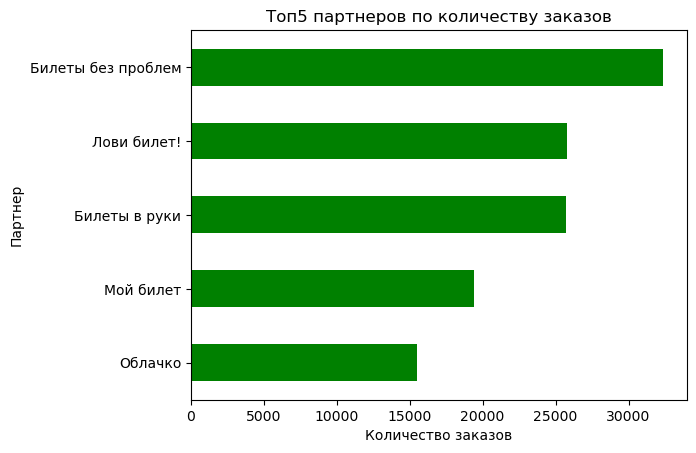

In [83]:
service_table.loc[service_table['order_id']>15000]['order_id'].sort_values().plot(kind='barh', color='green')
plt.title('Топ5 партнеров по количеству заказов')
plt.ylabel('Партнер')
plt.xlabel('Количество заказов')
plt.show()

На графике представлены Топ5 партеров по количеству заказов. Билеты без проблем самый активный - более 30000 заказов.

Наиболее активный билетный партнер - Билеты без проблем. Обработано 32383 заказов (19%), мероприятий - 2847 (16%), суммарная выручка - 12116010 руб (14.8%). 

Больше всего мероприятий обработано партнером Лови билет! - 3616 мероприятие (21%)

### Шаг 4. Статистический анализ данных

Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [87]:
device_type_count=autumn_orders['device_type_canonical'].value_counts()
device_type_count

device_type_canonical
mobile     134301
desktop     34300
Name: count, dtype: int64

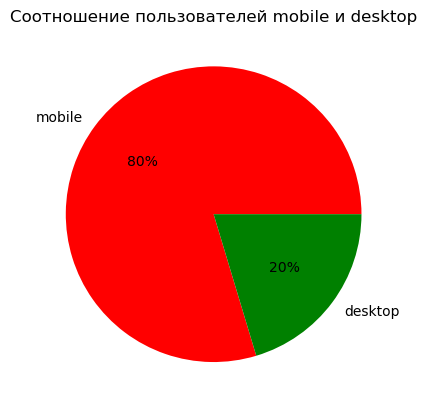

In [88]:
device_type_count.plot(
    kind= 'pie',
    title='Соотношение пользователей mobile и desktop',
    autopct='%.0f%%' ,
    ylabel='',
    colors=['red','green']
)

plt.show()

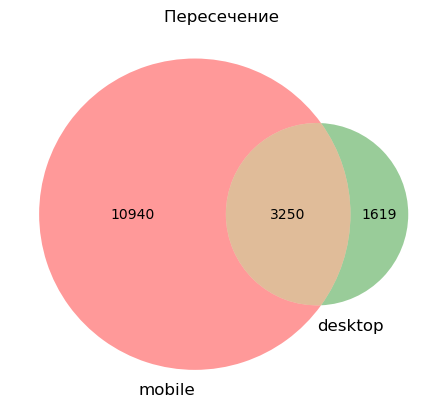

In [91]:
#создаем срез каждой группы пользователем
A = set(autumn_orders[(autumn_orders['device_type_canonical'] == 'mobile')]['user_id'].dropna().unique())
B = set(autumn_orders[(autumn_orders['device_type_canonical'] == 'desktop')]['user_id'].dropna().unique())

# Строим диаграмму Венна
venn2([A, B], set_labels=('mobile', 'desktop'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

In [92]:
ntests_per_user = autumn_orders.groupby('user_id').agg({'device_type_canonical': 'nunique'}).sort_values(by = 'device_type_canonical', ascending = False).reset_index()
print('Пользователей, попавших в обе группы:', ntests_per_user[ntests_per_user['device_type_canonical'] > 1]['user_id'].count())

Пользователей, попавших в обе группы: 3250


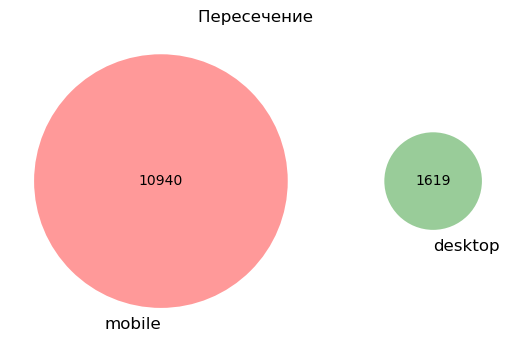

In [93]:
test_participants = autumn_orders[~autumn_orders['user_id'].isin(ntests_per_user[ntests_per_user['device_type_canonical'] > 1]['user_id'].values)]
#создаем срез каждой группы пользователем
A = set(test_participants[(test_participants['device_type_canonical'] == 'mobile')]['user_id'].dropna().unique())
B = set(test_participants[(test_participants['device_type_canonical'] == 'desktop')]['user_id'].dropna().unique())

# Строим диаграмму Венна
venn2([A, B], set_labels=('mobile', 'desktop'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

###### Гипотеза 1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Нулевая гипотеза H0: Среднее количество заказов на одного пользователя мобильных приложений равно среднему количеству заказов на одного пользователя стационарных устройств.

 
- Альтернативная гипотеза Н1: Среднее количество заказов на одного пользователя мобильных приложений больше, чем у пользователей стационарных устройств.


In [96]:
grouped_data = autumn_orders.groupby(['user_id', 'device_type_canonical'], observed=True)['order_id'].sum().reset_index()

# Разделение данных на мобильные и стационарные устройства
mobile_group = grouped_data[grouped_data['device_type_canonical'] == 'mobile']['order_id']
desktop_group = grouped_data[grouped_data['device_type_canonical'] == 'desktop']['order_id']

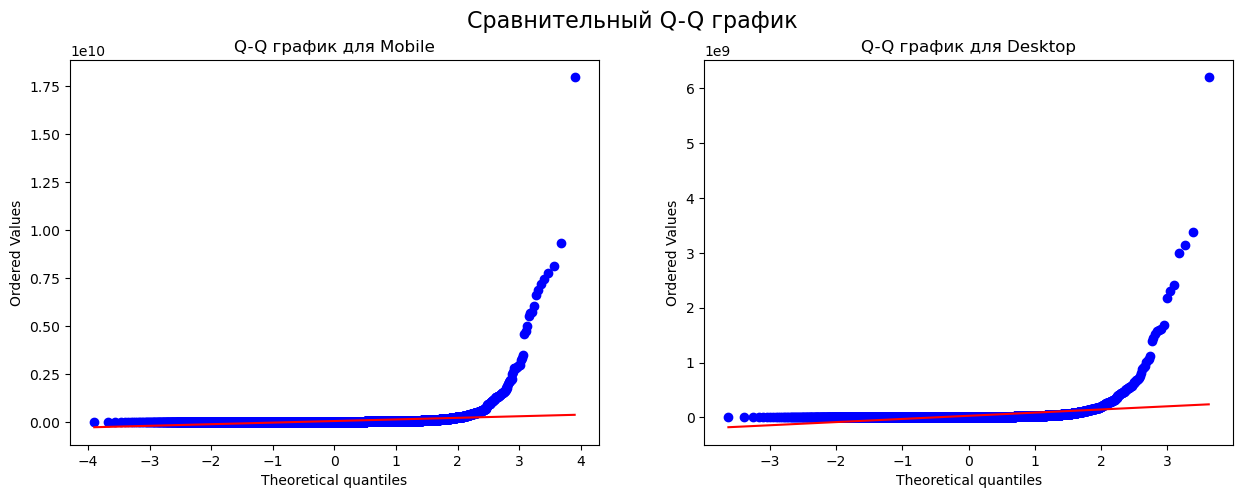

In [97]:
fig, axx = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
probplot(mobile_group, plot=axx[0])
axx[0].set_title("Q-Q график для Mobile")

probplot(desktop_group, plot=axx[1])
axx[1].set_title("Q-Q график для Desktop")
plt.suptitle('Сравнительный Q-Q график', fontsize=16)
plt.show()

In [98]:
# Тест Шапиро-Уилка для оценки нормальности
shap_stat_mob, shap_pval_mob = shapiro(mobile_group)
shap_stat_sta, shap_pval_sta = shapiro(desktop_group)

print(f"\nТест Шапиро-Уилка (нормальность):\n"
      f"Mobile: Статистика={shap_stat_mob:.4f}, p-значение={shap_pval_mob:.4f}\n"
      f"Stationary: Статистика={shap_stat_sta:.4f}, p-значение={shap_pval_sta:.4f}\n")

# Выбор подходящего теста в зависимости от нормальности
if min(shap_pval_mob, shap_pval_sta) > 0.05:
    print("\nДанные приблизительно нормально распределены.\n")
else:
    print("\nНормальное распределение не подтверждено, используем непараметрический подход.\n")


Тест Шапиро-Уилка (нормальность):
Mobile: Статистика=0.0818, p-значение=0.0000
Stationary: Статистика=0.1310, p-значение=0.0000


Нормальное распределение не подтверждено, используем непараметрический подход.



C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14190.
  res = hypotest_fun_out(*samples, **kwds)


In [167]:
u_statistic, p_value = st.mannwhitneyu(mobile_group, desktop_group, alternative='greater')

alpha = 0.05  # уровень значимости

if p_value < alpha:
    print("Нулевая гипотеза отвергнута: пользователи мобильных приложений делают больше заказов в среднем.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу: существенных различий в количестве заказов нет.")

Нулевая гипотеза отвергнута: пользователи мобильных приложений делают больше заказов в среднем.


###### Гипотеза 2: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
- Нулевая гипотеза H0: Среднее время между заказами пользователей мобильных приложений равно среднему времени между заказами пользователей стационарных устройств.
 
- Альтернативная гипотеза Н1: Среднее время между заказами пользователей мобильных приложений больше, чем у пользователей стационарных устройств.


In [100]:
data_sorted = autumn_orders.sort_values(by=['user_id', 'created_dt_msk']).reset_index(drop=True)

# Вычисляем интервал между заказами для каждого пользователя
data_sorted['interval'] = data_sorted.groupby('user_id')['created_dt_msk'].diff().dt.total_seconds() / 3600  # Переводим секунды в часы

# Исключаем первую строчку для каждого пользователя, так как там нет предыдущего заказа
data_filtered = data_sorted[data_sorted['interval'].notna()]
mobile_intervals = data_filtered[data_filtered['device_type_canonical'] == 'mobile']['interval']
desktop_intervals = data_filtered[data_filtered['device_type_canonical'] == 'desktop']['interval']

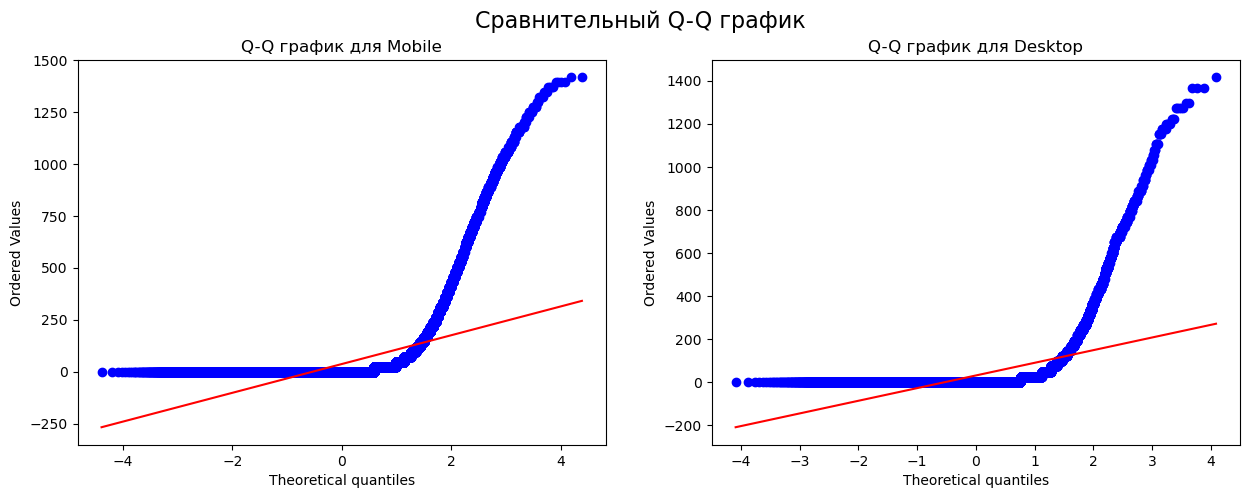

In [169]:
fig, axx = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
probplot(mobile_intervals, plot=axx[0])
axx[0].set_title("Q-Q график для Mobile")

probplot(desktop_intervals, plot=axx[1])
axx[1].set_title("Q-Q график для Desktop")
plt.suptitle('Сравнительный Q-Q график', fontsize=16)
plt.show()

In [101]:
# Тест Шапиро-Уилка для оценки нормальности
shap_stat_mob, shap_pval_mob = shapiro(mobile_intervals)
shap_stat_sta, shap_pval_sta = shapiro(desktop_intervals)

print(f"\nТест Шапиро-Уилка (нормальность):\n"
      f"Mobile: Статистика={shap_stat_mob:.4f}, p-значение={shap_pval_mob:.4f}\n"
      f"Stationary: Статистика={shap_stat_sta:.4f}, p-значение={shap_pval_sta:.4f}\n")

# Выбор подходящего теста в зависимости от нормальности
if min(shap_pval_mob, shap_pval_sta) > 0.05:
    print("\nДанные приблизительно нормально распределены.\n")
else:
    print("\nНормальное распределение не подтверждено, используем непараметрический подход.\n")


Тест Шапиро-Уилка (нормальность):
Mobile: Статистика=0.3526, p-значение=0.0000
Stationary: Статистика=0.3058, p-значение=0.0000


Нормальное распределение не подтверждено, используем непараметрический подход.



C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 121105.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31687.
  res = hypotest_fun_out(*samples, **kwds)


In [102]:
u_stat, p_value = st.mannwhitneyu(mobile_intervals, desktop_intervals, alternative='greater')

# Уровень значимости
alpha = 0.05

# Принятие решений
if p_value < alpha:
    print("Нулевая гипотеза отвергнута: среднее время между заказами пользователей мобильных устройств выше.")
else:
    print("Нулевая гипотеза принята: нет достаточных доказательств того, что среднее время между заказами пользователей мобильных устройств выше.")

Нулевая гипотеза отвергнута: среднее время между заказами пользователей мобильных устройств выше.


## Выводы
- Проведена работа с данными о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года.

Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.

Второй датасет final_tickets_events_df.csv содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

Третий датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. 

- Типы данных оптимизированы, типы данных приведены к необходимым.
- Исключены выбросы из данных по выручке.
- Добавлены новые столбцы (revenue_rub, one_ticket_revenue_rub, month и season).
- Наиболее популяный день недели для заказов - вторник. В выходные пользователи совершают меньше заказов, чем в будни.
- Наиболее популярный регион - Каменевский регион. 
- Наиболее активный билетный партнер - Билеты без проблем.
- Проверены две гипотезы. Проведены тесты Манна-Уитни, в результате можно сделать следующие выводы: пользователи мобильных приложений делают больше заказов в среднем и среднее время между заказами пользователей мобильных устройств выше.